# Homework #1: Computational Portion Edited By Juan Vargas-Murillo
All computations should be done in this notebook using the R kernel. This is your first opportunity to get familiar with R outside of class, so please take your time on the problems that require it. Working in small groups is allowed, but it is important that you make an effort to master the material and hand in your own work.

#### You will be required to submit this file (with your solutions) to Canvas by 2pm on Wednesday, January 30.

## Problem 1

#### (a) Load the adm.txt file into R (this file can be found on the course webpage: https://www.colorado.edu/amath/sites/default/files/attached-files/adm.txt.


The dataset contains information from six departments at a University. The variables are:

1. dpt = department name (A through F)
2. app = the number of applications received by a department's graduate program.
3. adm = the number of applications accepted to a department's graduate program.
4. sex: m = male; f = female

In [1]:
adm_data <- read.table('https://www.colorado.edu/amath/sites/default/files/attached-files/adm.txt')
head(adm_data)

dpt,app,adm,sex
A,825,512,m
B,560,353,m
C,325,120,m
D,417,138,m
E,191,53,m
F,272,16,m


#### (b) Write code that extracts and prints the data from department B only.

In [2]:
dpt_b <- adm_data$dpt == 'B'

In [3]:
adm_data[dpt_b,]

,dpt,app,adm,sex
2,B,560,353,m
8,B,25,17,f


#### (c) Write code that prints departments with a admission rate of lower than 40%.

In [4]:
adm_rate <- (adm_data$adm[adm_data$sex == "m"] + adm_data$adm[adm_data$sex == "f"]) / (adm_data$app[adm_data$sex == "m"] + adm_data$app[adm_data$sex == "f"])

adm_rate


[1] 0.64415863 0.63247863 0.35076253 0.33964646 0.25171233 0.06525285

In [5]:
adm_data[adm_rate < .4,]

,dpt,app,adm,sex
3,C,325,120,m
4,D,417,138,m
5,E,191,53,m
6,F,272,16,m
9,C,593,202,f
10,D,375,131,f
11,E,393,94,f
12,F,341,24,f


#### (d) What is the addmission rate for all males at this university (across all departments)?

In [9]:
male_adm_rate <- adm_data$adm[adm_data$sex == "m"] / adm_data$app[adm_data$sex == "m"]
male_adm_rate

[1] 0.62060606 0.63035714 0.36923077 0.33093525 0.27748691 0.05882353

#### (d) What is the addmission rate for all females at this university (across all departments)?

In [10]:
# female_adm_rate <- sum(adm_data$adm[adm_data$sex == "f"]) / sum(adm_data$app[adm_data$sex == "f"])
female_adm_rate <- adm_data$adm[adm_data$sex == "f"] / adm_data$app[adm_data$sex == "f"]
female_adm_rate

[1] 0.82407407 0.68000000 0.34064081 0.34933333 0.23918575 0.07038123

#### (e) Is there a large discrepancy? Could this be evidence of discrimination against female applicants?

There is not a large discrepancy that could be evidence of discrimination against female applicants as female applicants are 20% more likely to get admitted into department A and for the rest of the departments the difference in percentages is less than 5%.

#### (f) What is the rate of admission for males, and separately, females, at this university, conditioned on department? Create a data frame with labeled columns in the following order: Department, Female, Male

In [16]:
dpt_male_female <- cbind(Department = c("A", "B", "C", "D", "E","F"),Female = female_adm_rate, Male = male_adm_rate)
dpt_male_female

Department,Female,Male
A,0.824074074074074,0.620606060606061
B,0.68,0.630357142857143
C,0.340640809443508,0.369230769230769
D,0.349333333333333,0.330935251798561
E,0.239185750636132,0.277486910994764
F,0.0703812316715543,0.0588235294117647


#### (g) What do you notice about these results? Are they in tension with the result from (d)?

Female applicants are more likely to get admitted when they apply for department A, B, and D while male applicants are more likely to get admitted when they apply to departments C and E and both male and female applicants applying for department F have a very low admission rate.

## Problem 2

Verify the results of theoretical question 3, parts (c) and (d), by simulating 50 data points $x_1,...,x_{50}$ with mean of 5 and st. dev. of 1 using ${\tt rnorm()}$ and then performing the relevant computations. _Include #comments in your code to explain what you are doing._

In [18]:
x <- rnorm(50, 5, 1)

y <- x - mean(x)

# calculate the mean x and the mean the of y
mean_x <- mean(x)
mean_y <- mean(y)

# calculate the variance of both x and y
var_x <- var(x)
var_y <- var(y)

# calculate the standard deviation of both the x and y
sd_x <- sd(x)
sd_y <- sd(y)


# new sample data based off of x
z <- (x - mean(x)) / sd(x)

# the mean of z
mean_z <- mean(z)

# the variance of z
var_z <- var(z)

# the standard deviation of z
sd_z <- sd(z)


In part (c) above we show that taking the difference between a sample and that sample's mean yields a new sample of the same size with the same standard deviation and variance as the original sample.

In [19]:
# check to see if the variance of y is equal to the variance of x
var_y == var_x

[1] TRUE

In [20]:
# check to see if the standard deviation of y is equal to the standard deviation of x
sd_y == sd_x

[1] TRUE

In part (d) we show that dividing the difference of the sample and its mean by the sample's standard deviation gives us a new sample of the same size with standard deviation and variance equal to 1.  Note also that this new sample has a mean of approximately 0 (may not be identically 0 due to numerical and floating point error). 

In [21]:
# check to see if the standard deviation of z is equal to 1
sd_z

[1] 1

In [22]:
# check to see if the standard deviation of z is equal to 1
var_z

[1] 1

## Problem 3

#### (a) The data frame VIT2005 in the PASWR2 package contains descriptive information and the appraised total price (in euros) for apartments in Vitoria, Spain. _Load the data vit2005.txt into R_. It can be found at this link: https://www.colorado.edu/amath/sites/default/files/attached-files/vit2005.txt. 

Here are descriptions of the variables:

1. totalprice (the market total price (in Euros) of the apartment including garage(s) and storage room(s))

2. area (the total living area of the apartment in square meters)

3. zone (a factor indicating the neighborhood where the apartment is located with levels Z11, Z21, Z31, Z32, Z34, Z35, Z36, Z37, Z38, Z41, Z42, Z43, Z44, Z45, Z46, Z47, Z48, Z49, Z52, Z53, Z56, Z61, and Z62)

4. category (a factor indicating the condition of the apartment with levels 2A, 2B, 3A, 3B, 4A, 4B, and 5A ordered so that 2A is the best and 5A is the worst)

5. age (age of the apartment in years)

6. floor (floor on which the apartment is located)

7. rooms (total number of rooms including bedrooms, dining room, and kitchen)

8. out (a factor indicating the percent of the apartment exposed to the elements: The levels E100, E75, E50, and E25, correspond to complete exposure, 75% exposure, 50% exposure, and 25% exposure, respectively.)

9. conservation (is an ordered factor indicating the state of conservation of the apartment. The levels 1A, 2A, 2B, and 3A are ordered from best to worst conservation.)

10. toilets (the number of bathrooms)

11. garage (the number of garages)

12. elevator (indicates the absence (0) or presence (1) of elevators.)

13. streetcategory (an ordered factor from best to worst indicating the category of the street with levels S2, S3, S4, and S5)

14. heating (a factor indicating the type of heating with levels 1A, 3A, 3B, and 4A which correspond to: no heating, low-standard private heating, high-standard private heating, and central heating, respectively.)

15. storage (the number of storage rooms outside of the apartment)

In [23]:
vit_data <- read.table('https://www.colorado.edu/amath/sites/default/files/attached-files/vit2005.txt')

#### (b) Explore the data by providing a numerical summary of all variables.

In [24]:
summary(vit_data)

   totalprice          area             zone     category      age       
 Min.   :155000   Min.   : 50.38   Z41    : 18   2A: 4    Min.   :  1.0  
 1st Qu.:228500   1st Qu.: 75.18   Z53    : 16   2B:14    1st Qu.: 11.0  
 Median :269750   Median : 86.39   Z52    : 15   3A:61    Median : 16.0  
 Mean   :280742   Mean   : 88.70   Z61    : 14   3B:77    Mean   : 19.9  
 3rd Qu.:328625   3rd Qu.: 99.90   Z62    : 14   4A:36    3rd Qu.: 24.0  
 Max.   :560000   Max.   :187.91   Z45    : 13   4B:23    Max.   :118.0  
                                   (Other):128   5A: 3                   
     floor           rooms         out      conservation    toilets     
 Min.   : 1.00   Min.   :3.000   E100:122   1A:161       Min.   :1.000  
 1st Qu.: 3.00   1st Qu.:5.000   E25 :  3   2A: 18       1st Qu.:1.000  
 Median : 4.00   Median :5.000   E50 : 87   2B: 36       Median :1.000  
 Mean   : 4.44   Mean   :4.853   E75 :  6   3A:  3       Mean   :1.468  
 3rd Qu.: 5.00   3rd Qu.:5.000             

In [3]:
head(vit_data)

totalprice,area,zone,category,age,floor,rooms,out,conservation,toilets,garage,elevator,streetcategory,heating,storage
228000,75.31,Z45,4B,33,3,5,E100,2B,1,0,1,S3,3A,0
409000,100.65,Z31,3B,5,7,5,E50,1A,2,1,1,S5,4A,1
200000,88.87,Z52,3A,14,8,5,E50,1A,2,0,1,S2,3A,0
180000,62.61,Z62,4A,41,3,4,E50,2A,1,0,0,S3,1A,0
443600,146.15,Z31,3A,22,6,7,E100,1A,2,0,1,S4,4A,1
173000,77.21,Z11,4B,35,4,5,E50,1A,1,0,0,S4,3A,1


#### (c) Create a frequency table, a piechart, and a barplot showing the numbers of apartments grouped by the variable ${\tt out}$. For you, which method converys the information best? (See ${\tt table()}$, ${\tt pie()}$ and ${\tt barplot()}$)

In [29]:
freq <- table(vit_data$out)
lbls <- paste(names(freq), "\n", freq, sep="")
freq


E100  E25  E50  E75 
 122    3   87    6 

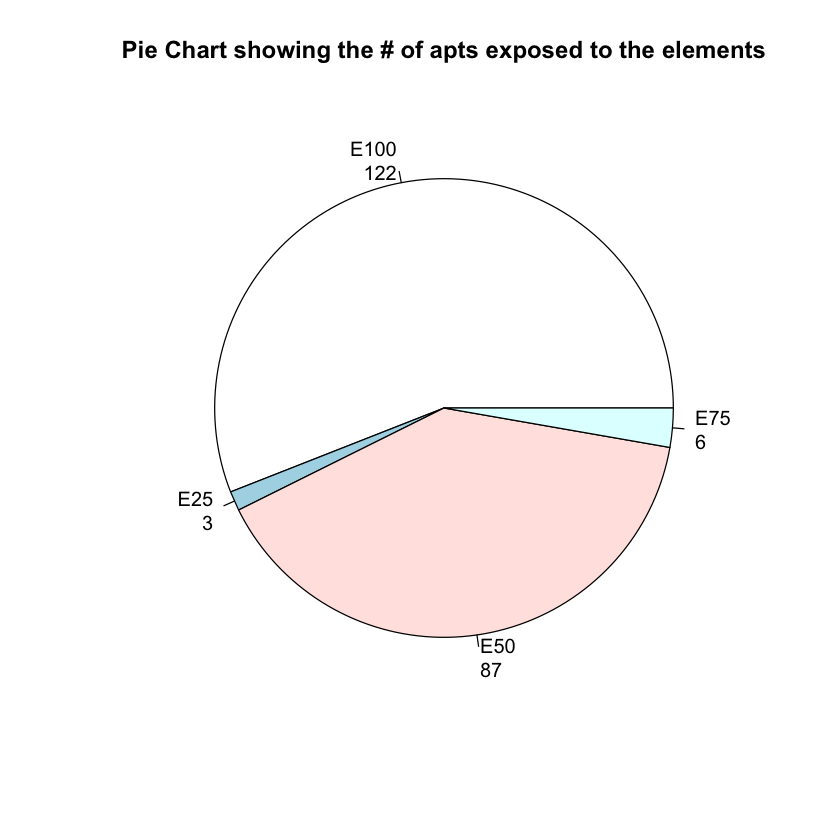

In [28]:
# ?count.fields
pie(freq, labels = lbls, main = "Pie Chart showing the # of apts exposed to the elements")

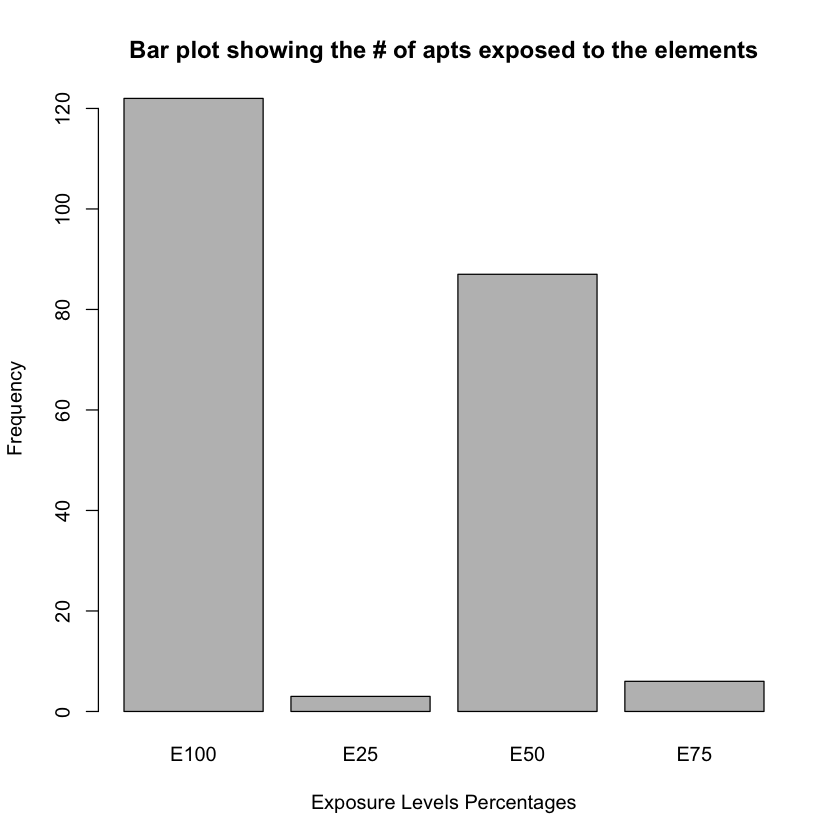

In [79]:
barplot(freq, main = "Bar plot showing the # of apts exposed to the elements", xlab = "Exposure Levels Percentages", ylab = "Frequency")


I think that the ```barplot()``` is able to convey the information about the percentage of apartments exposed to the elements the best because it is able to separate the levels more, providing a visual aid, that allows us to notice the difference between the levels of exposure.

#### (d) Characterize the distribution of the variable ${\tt total price}$ using ${\tt hist()}$ and ${\tt boxplot()}$. Is the distribution _(i)_ symmetric/skewed, or _(ii)_ unimodal/multimodal? _(iii)_ Does it have any outliers? 

In [47]:
options(scipen = 999) # disable scientifc notation
totprice <- vit_data$totalprice
#totprice


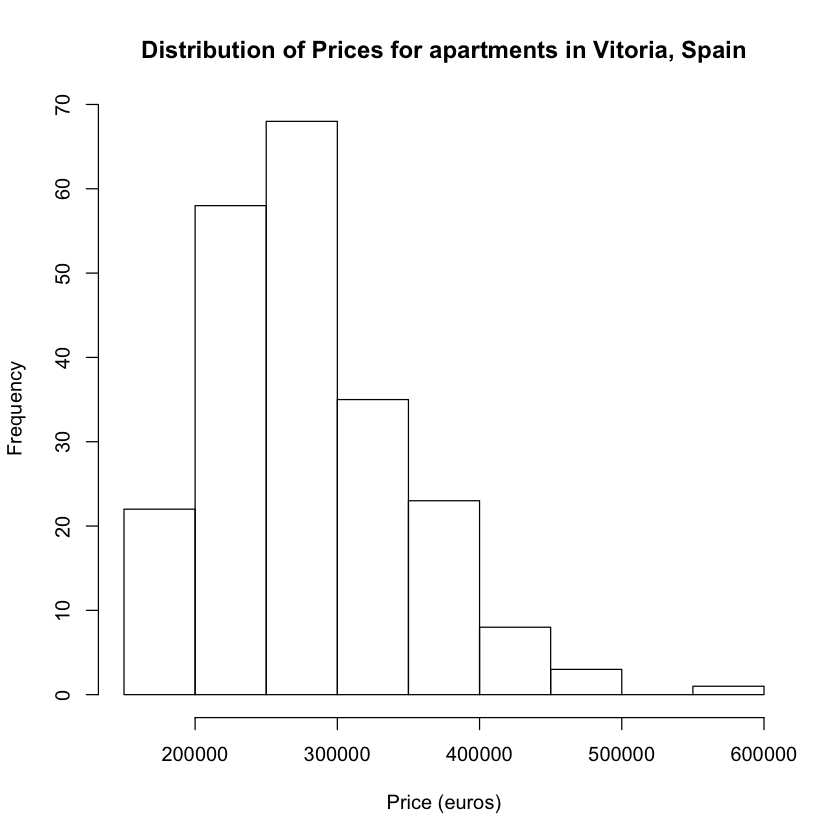

In [77]:
hist(totprice, main = "Distribution of Prices for apartments in Vitoria, Spain", xlab = "Price (euros)")



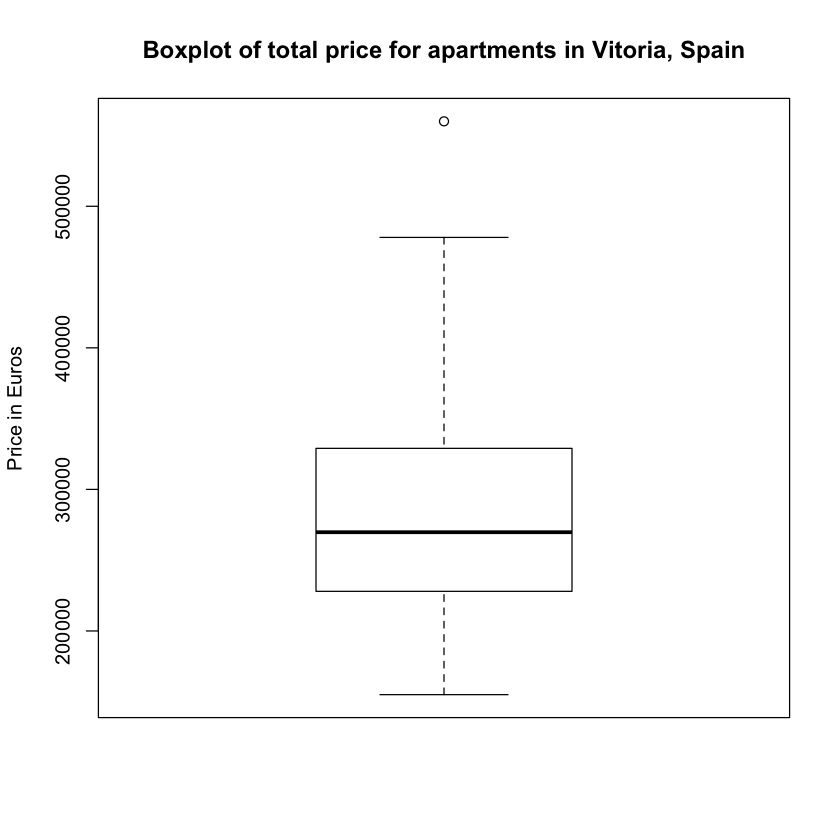

In [63]:
boxplot(totprice, main = "Boxplot of total price for apartments in Vitoria, Spain", ylab = "Price in Euros")

The distribution is unimodal and skewed to the right and there is one outlier.

#### (e) Characterize the relationship between ${\tt totalprice}$ and ${\tt area}$ using ${\tt plot()}$. _Don't forget to title your plot!_

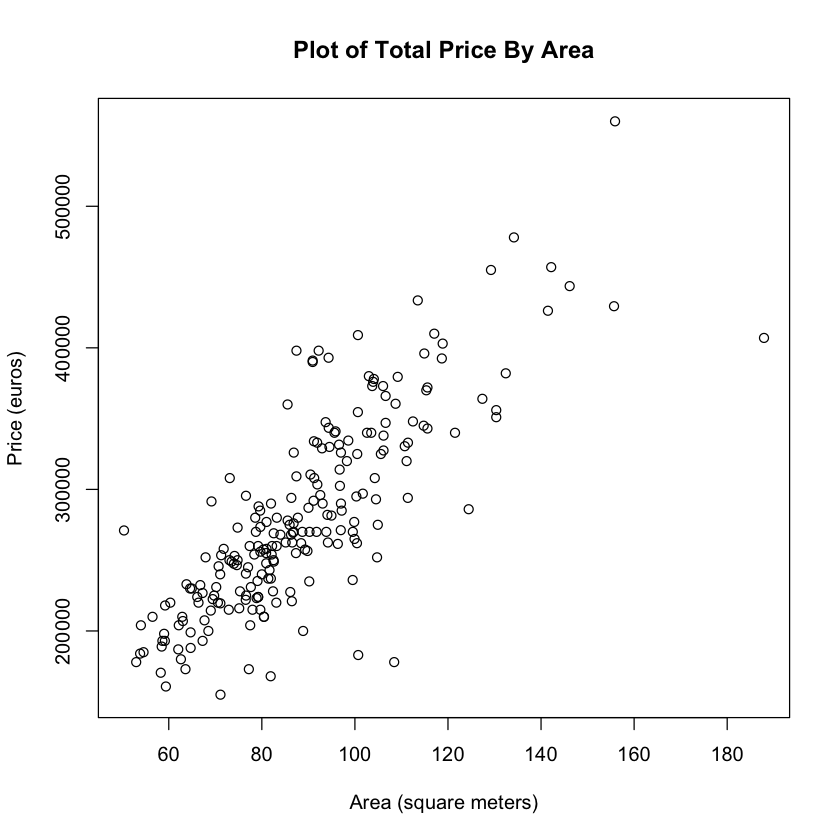

In [68]:
area <- vit_data$area
plot(area, totprice, main = "Plot of Total Price By Area",  xlab = "Area (square meters)", ylab = "Price (euros)")

The distribution of prices of apartments in Vitoria, Spain against the area of the apartment shows that most of the apartments have an area of 110 squared meters or less and that the most apartment prices range from 20000 to 35000. There also seems to be a linear relationship between the area of the apartment and its total price, that is, as the area of the apartment increases so does the total price of the apartment.

#### (f) Create a boxplot of ${\tt totalprice}$ conditioned on ${\tt toilets}$. Are there any outliers? Does there appear to be a large difference in total price between apartments with one bathroom and apartments with two bathrooms? Title the boxlplot _"Boxplot of Total Price By Number of Bathrooms"_

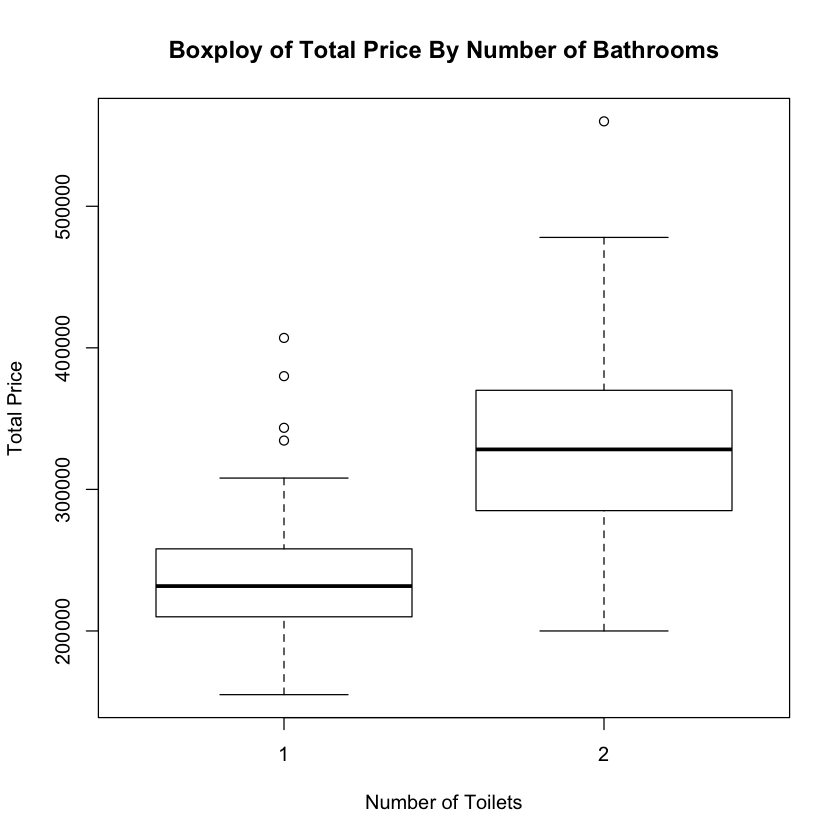

In [66]:
toilets <- vit_data$toilets
boxplot(totprice~toilets, main = "Boxplot of Total Price By Number of Bathrooms", ylab = "Total Price", xlab = "Number of Toilets")



Apartments with two bathrooms do tend to cost more than apartments with only one bathroom, the median price for an apartment with two bathrooms is considered an outlier with respect to the boxplot of apartments with one bathroom.

#### (g) Explore the relationships between at least three variable pairs (not explored above) of ${\tt totalprice}$ using the appropriate graphical summaries. Provide the plots and written interpretations! Don't forgot to title and label all your plots.

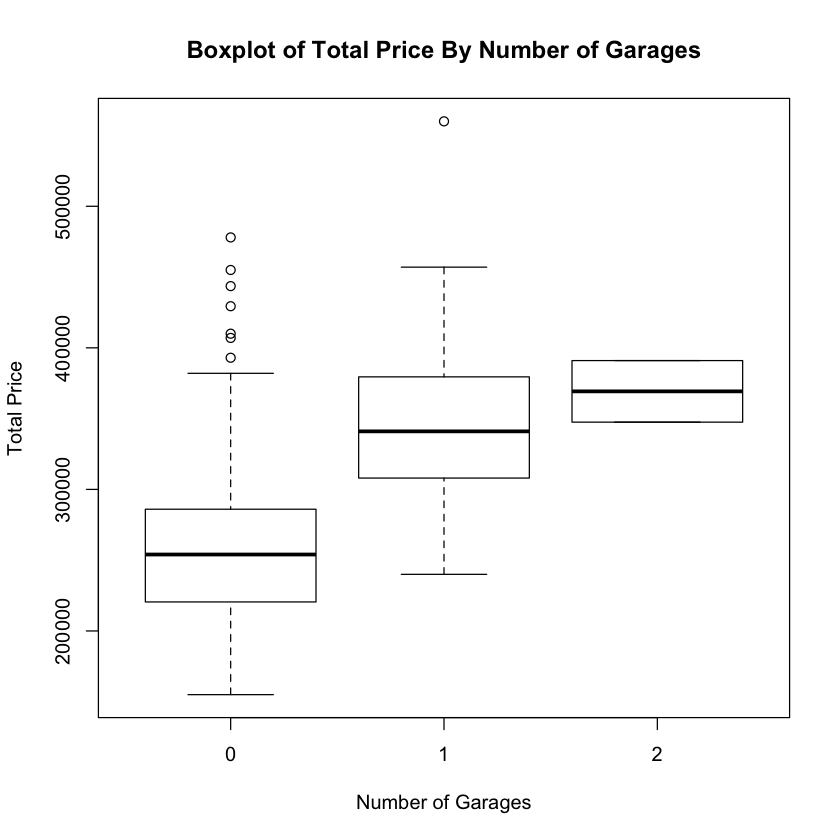

In [80]:
garage <- vit_data$garage

boxplot(totprice~garage, main = "Boxplot of Total Price By Number of Garages", ylab = "Total Price", xlab = "Number of Garages")



From the boxplot of total price conditioned on number of garages we see that as the number of garages the apartment has the more the total price would be. Also we see that there are some apartments that have no garages but are as costly if not more than apartments with 1 or 2 garages.

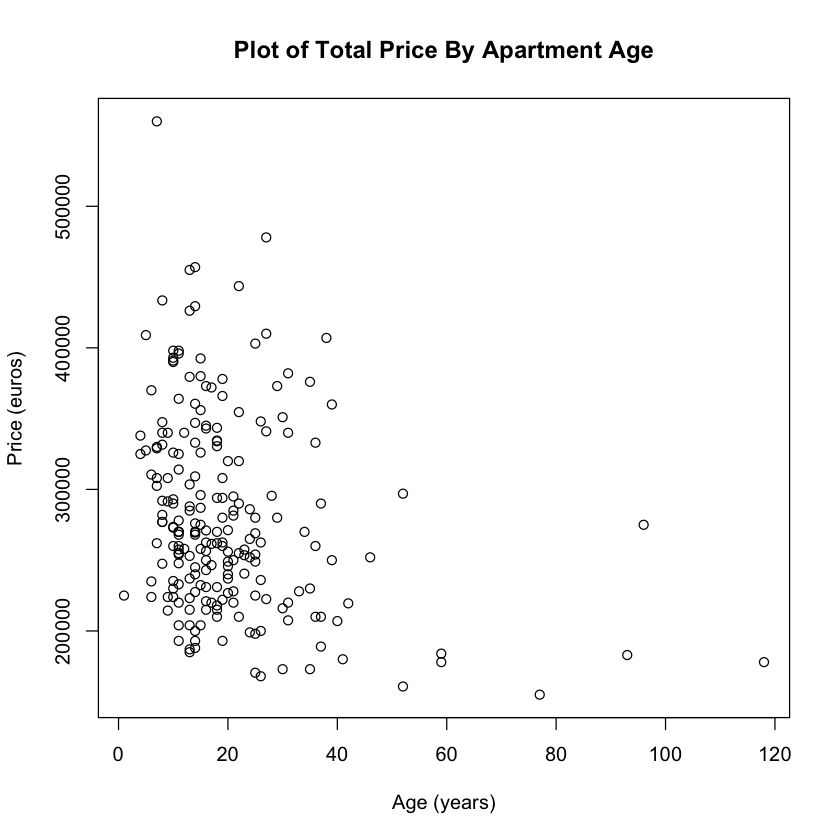

In [81]:
age <- vit_data$age
plot(age, totprice, main = "Plot of Total Price By Apartment Age",  xlab = "Age (years)", ylab = "Price (euros)")



Here the plot of total apartment price conditioned on age of the apartment shows that most prices are clusters around the 0 to 40 year range of apartments. We can also see very old apartments tend to be pretty cheap, relatively speaking. 

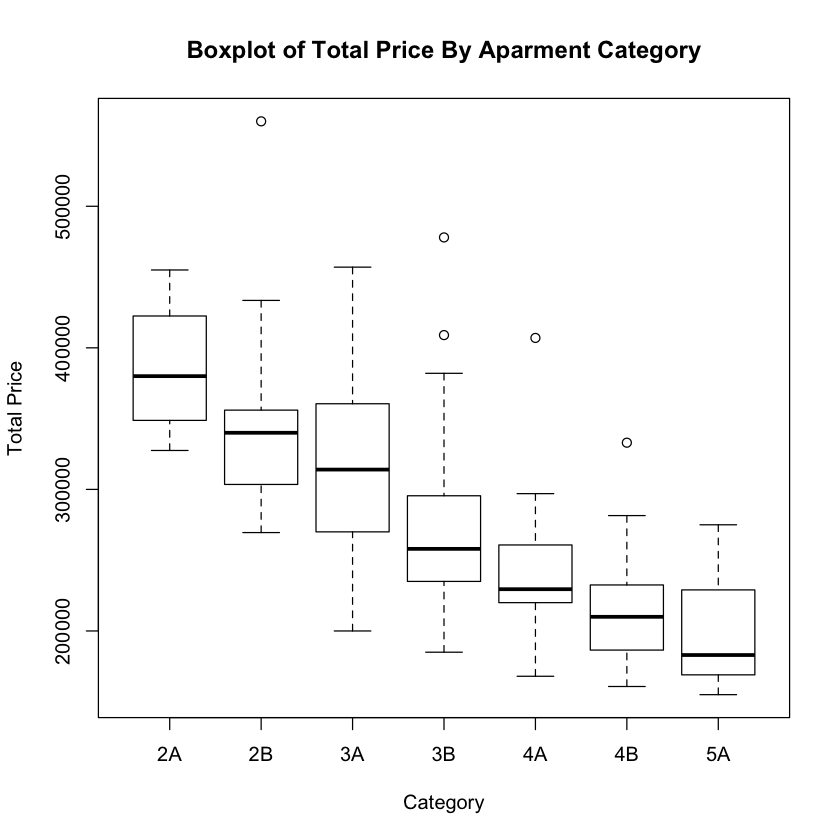

In [82]:
category <- vit_data$category

boxplot(totprice~category, main = "Boxplot of Total Price By Aparment Category", ylab = "Total Price", xlab = "Category")



This boxplot shows the total price of an apartment conditioned on the apartments condition category, with 2A being the apartment is in great condition and 5A being the apartment is in very bad condition. The graph makes this relationship evident because we see that as we move from apartments in the 2A category towards apartments in the 5A category the total price for the apartment goes down. 